# Text classification with Transformer

---



**Author:** [Apoorv Nandan](https://twitter.com/NandanApoorv)<br>
**Date created:** 2020/05/10<br>
**Last modified:** 2020/05/10<br>
**Description:** Implement a Transformer block as a Keras layer and use it for text classification.

~~~
    주제 선정 이유 -
    
    이전에 LMS 학습 노드 (Exploration Node.14) 에서 다루었던

    Transformer 부분이 어려워서 넘어갔던 부분들이 있었는데,

    이번 Keras Code Review 시간을 통해 조금 더 깊이 연구해 보고자 이 주제를 선정하게 되었습니다.
~~~

구매자 또는 고객이 제품을 구매하기 전에 자주하는 직관적인 일 중 하나는 리뷰를 확인하고 특정 제품이 얼마나 좋은지 별로인지를 분석하는 것입니다.

인간의 경우 특정 리뷰를 읽고 작성된 문장에 대한 의미 론적 이해를 얻는 것이 쉽습니다. 

인간은 특정 언어에 적응 한 지식을 인식하기 때문에 문장이나 리뷰의 진정한 의미를 인식하기 위해 언어 개념의 숨겨진 의도, 풍자 또는 기타 중요한 측면을 대부분 이해할 수 있습니다. 

인간은 직관을 사용하여 해석을 도울 수 있지만 직관의 개념은 기계에 존재하지 않습니다. 기계는 이진 형식이 아닌 것을 이해하려고 할 때 내재된 복잡성으로 인해 특정 문장의 진정한 의도와 의미를 해독하기가 어렵습니다.

"Attention Is All You Need"라는 제목의 연구 논문에 발표 된 트랜스포머 아키텍처는 딥 러닝 및 자연어 처리 분야에서 가장 영향력있는 논문 중 하나입니다. 

먼저 위 그림에 표시된 트랜스포머 아키텍처의 왼쪽에 대해 짚어 보겠습니다. 

포지셔널 인코딩, 입력, 입력 임베딩 및 일부 신경망 구성 요소를 포함하는 블록이 있는 인코더 아키텍처로 구성됩니다.

이 블록을 트랜스포머 블록이라고 부르며 트랜스포머의 작동 절차를 이해하는 데 필수적인 측면이 될 것입니다.

## Why Transformer?
- Transformer는 2017년에 등장해 NLP 분야에서 혁신적인 성과를 이끌어낸 논문이다. 비단 NLP뿐만이 아니라 다른 ML Domain 내에서도 수없이 활용되고 있다.
  
  
- `Transformer의 가장 큰 contribution은 이전의 RNN(Recurrent Neural Network) model이 불가능했던 병렬 처리를 가능케 했다는 점` 이다. GPU를 사용함으로써 얻는 가장 큰 이점은 병렬 처리를 한다는 것인데, RNN과 같은 model은 GPU 발전의 혜택을 제대로 누리지 못했다. 앞으로 GPU의 발전은 더욱 가속화될 것이기에, Recurrent network의 한계는 점점 더 두드러질 것이다. __Recurrent network를 사용하는 이유는 텍스트, 음성 등의 sequential한 data를 처리하기 위함인데, sequential하다는 것은 등장 시점(또는 위치)을 정보로 취급한다는 의미이다. 따라서 context vector를 앞에서부터 순차적으로 생성해내고, 그 context vector를 이후 시점에서 활용하는 방식으로 구현__ 한다. 즉, 이후 시점의 연산은 __앞 시점의 연산에 의존적이다. 따라서 앞 시점의 연산이 끝나지 않을 경우, 그 뒤의 연산을 수행할 수 없다.__ 이러한 이유로 RNN 계열의 model은 병렬 처리를 제대로 수행할 수 없다.
  
  
- Transformer는 이를 극복했다. Attention 개념을 도입해 어떤 특정 시점에 집중하고, Positional Encoding을 사용해 sequential한 위치 정보를 보존했으며, 이후 시점에 대해 masking을 적용해 이전 시점의 값만이 이후에 영향을 미치도록 제한했다. 그러면서도 모든 과정을 병렬처리 가능하도록 구현했다. Transformer를 직접 pytorch를 사용해 구현하고, 학습시키며 이러한 특징들을 이해해보자. 본 포스트의 모든 code는 Harvard NLP를 참조해 작성했다.

Attention is all you need 논문에서 저자(Vaswani)는 아래의 그림으로 트랜스포머를 설명하고 있다.

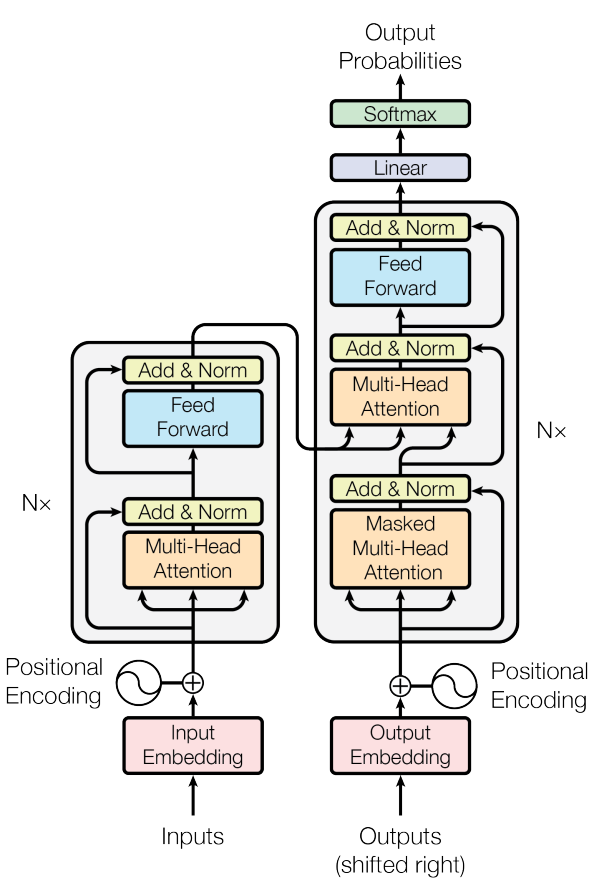<br>
Figure 1: The Transformer - model architecture.

화살표는 트랜스포머 아키텍처에서 수행될 direct 및 skip connections (Residual learning)을 나타냅니다.

멀티 헤드 어텐션 모듈은 세 가지 입력, 즉 Key, Value, Query 를 수신합니다. 

다음의 세 블록은 addition 및 normalization 연산을 수행하고, 피드포워드 네트워크를 통과하고, addition 및 normalization 연산을 reform 하므로 매우 간단합니다.

- Residual learning을 한다.

    + 특정 단계를 건너뛰어서 복사가 된 값을 이용하는 것.

    + 이를 이용해 기존의 부분은 건너뛰고 잔여된 부분만 학습하기에 global optima를 찾기에 더 수월하다.

## Why Positional Encoding?

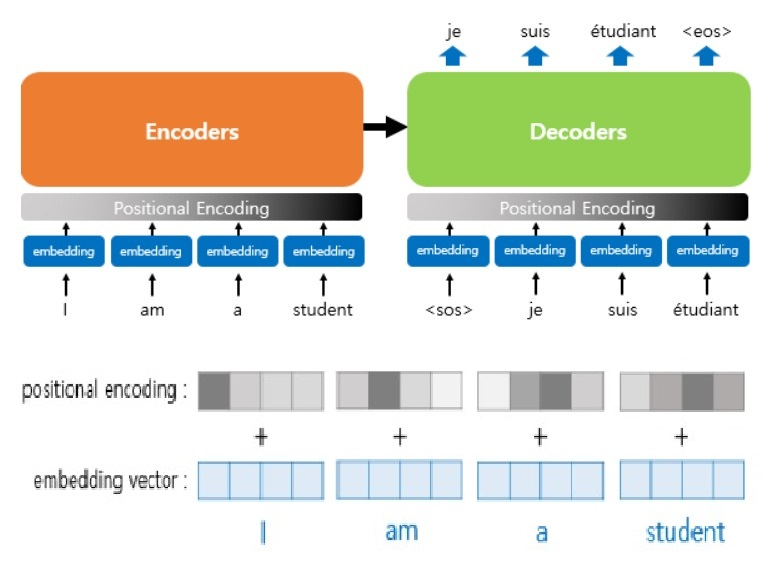


- 트랜스포머를 이용해 문장을 번역한다고 해봅시다.
    
    
- 문장을 구성하는 각각의 단어를 embedding 해서 row vector x1 ,x2 ,x3,.. ,xn 을 만들었습니다.
    
    
- 이 모델을 입력으로 넣을 때 아래와 같이 matrix 형태로 넣어버립니다.
    
    
- $X\ =\begin{pmatrix}x_1\\x_2\\x_3\\.\\.\\.\\x_n\end{pmatrix}$ X =(
x1​
x2​
x3​
.
.
.
xn​
)​

    
- 기존의 RNN계열은 x1 -> x2 -> x3 같은 시퀀셜한 시계열 데이터를 받았지만 트랜스포머는 그렇지 않다.
- 병렬 형태의 데이터가 한꺼번에 입력되며 시계열 데이터 이용하지 않는다.
- 이 데이터간의 상관관계를 위하여 Positional Encoding을 한다.

- Positional Encoding의 수식

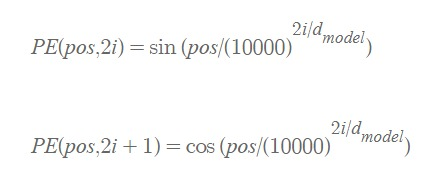


- 홀수열엔 sin, 짝수열엔 cos을 이용한다.
    
- 위의 수식을 이용해 PE(x)를 구한 후 기존의 입력 x와 더하여 x+PE(x)를 입력으로 사용하게 된다.


&nbsp;

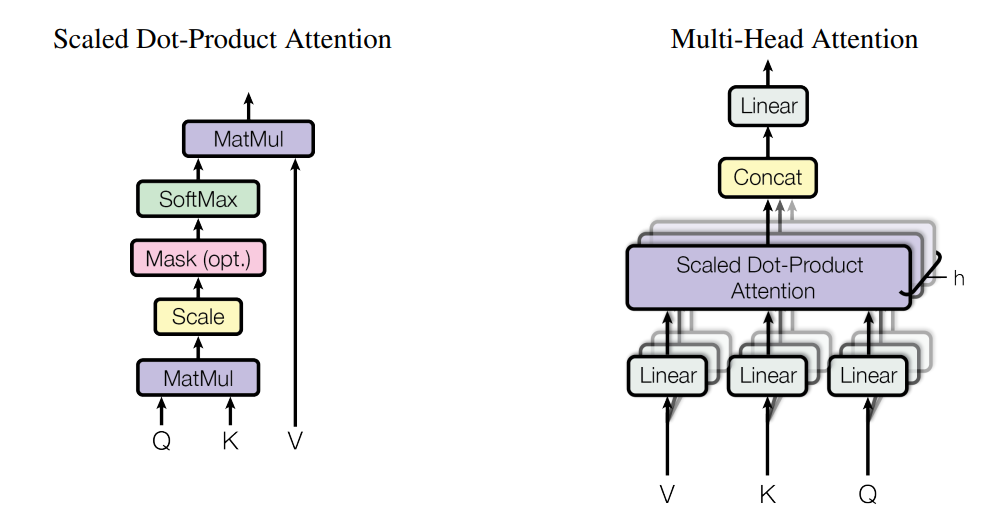

이 데이터는 위의 그림에서 언급한 것과 유사한 모델을 활용하는 scaled dot-product attention 을 통해 전달됩니다. 

- Attention
    - 예> I am a teacher
    - **Q : 무엇인가 물어보는 주체**
        - teacher라는 단어가 i 로 들어왔을 때 i라는 주체가 Q이다.
    - **K : 물어보는 대상**
        - teacher라는 단어 i가 입력되었을때 i am a teacher 각각 단어가 key가 됨. 
        - 해당 단어가 어떤 단어와 가장 연관성이 높은지(가장 높은 가중치를 지니는지)에 대해 구함.
    - **QK -> 각각의 단어에 대한 attention score를 구한 값**
    - **V : QK * V = attention value**

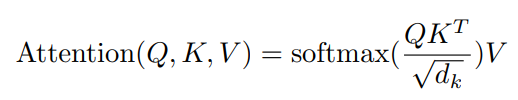

마지막으로 결과는 임베딩과 동일한 크기를 검색하도록 연결된 다음 선형 레이어을 통과합니다.

&nbsp;

마지막으로, 트랜스포머 네트워크의 오른편은 이전에 다룬 인코더와 몇 가지 유사점을 포함하는 디코더 아키텍처로 구성됩니다. 

여기에는 두 개의 트랜스포머 블록이 있으며, 하나는 각 연속 출력이 이전 입력에 대한 정보만 가지고

다른 과도한 정보는 갖지 않도록 마스킹된 multi-head attention 이 있습니다. 

그림의 Nx는 특정 작업을 계산하기 위해 인코더 또는 디코더 블록의 여러 스택이 있을 수 있다는 개념을 나타냅니다. 

이 프로젝트에서는 텍스트 분류에 대해 원하는 결과를 얻기 위해 transformer 블록의 더 간단한 변형을 사용합니다.

&nbsp;

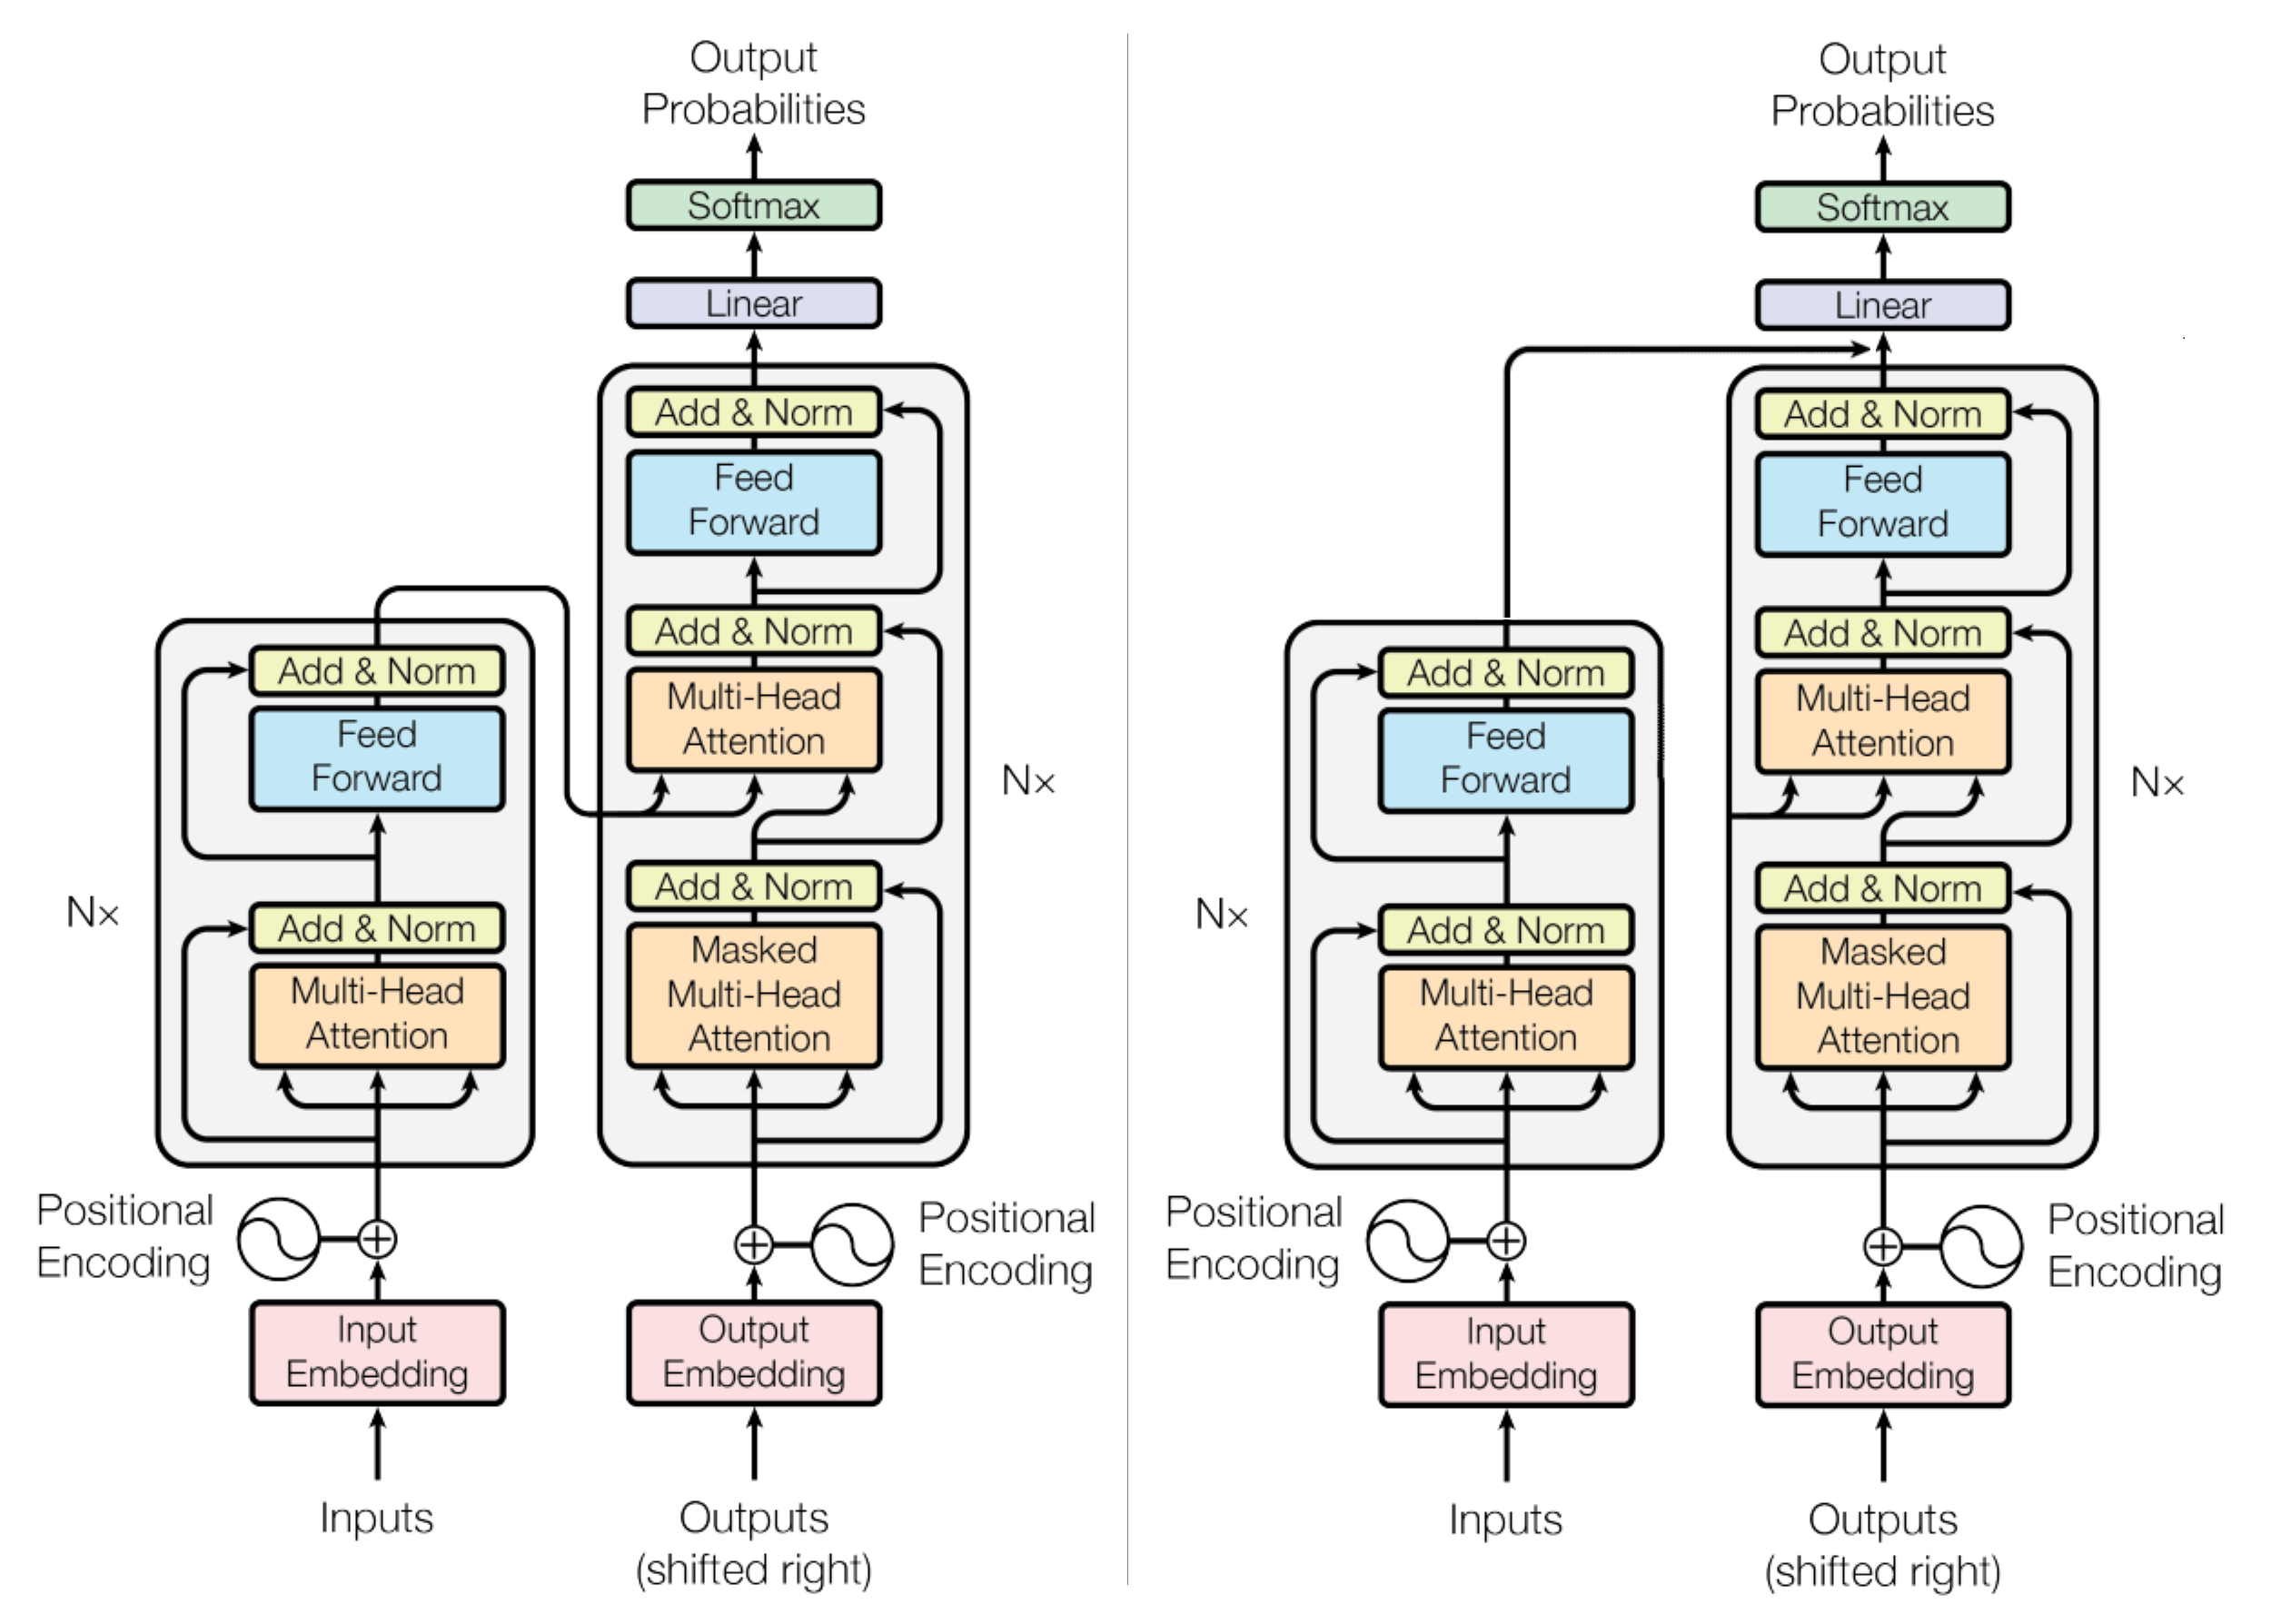

여기서부터는 텍스트 분류 문제를 해결하고 원하는 결과를 얻기 위해 트랜스포머 아키텍처를 구성합니다.

TensorFlow에서 사용할 수 있는 IMDB 데이터 세트를 활용하여 텍스트 분류 프로젝트를 수행하고, 

이에 따라 긍정적 또는 부정적 리뷰를 분류하는 프로젝트입니다.

<hr>

## Setup

In [1]:
!pip install tensorflow

  Using cached grpcio-1.50.0-cp39-cp39-win_amd64.whl (3.7 MB)
  Using cached wrapt-1.14.1-cp39-cp39-win_amd64.whl (35 kB)
  Using cached protobuf-3.19.6-cp39-cp39-win_amd64.whl (895 kB)
  Using cached absl_py-1.3.0-py3-none-any.whl (124 kB)
  Using cached typing_extensions-4.4.0-py3-none-any.whl (26 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached Markdown-3.4.1-py3-none-any.whl (93 kB)
  Using cached Werkzeug-2.2.2-py3-none-any.whl (232 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached rsa-4.9-py3-none-any.whl (34 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached zipp-3.10.0-py3-none-any.whl (6.2 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
  Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)
  Using cached MarkupSaf

첫 번째 단계에서는 Transformers를 사용하여 텍스트 분류 프로젝트에 필요한 모든 필수 라이브러리를 가져옵니다.

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

## **Implement a Transformer block as a layer**

트랜스포머 블록 구성을 합니다.

트랜스포머 블록의 첫 번째 함수에서는 필요한 매개변수, 즉 어텐션 레이어, 배치 정규화 및 드롭아웃 레이어, 피드포워드 네트워크를 초기화합니다. 

트랜스포머 블록의 call() 함수에서는 트랜스포머 블록의 아키텍처 개요에서 다룬대로 그에 따라 계층을 정의합니다.

In [2]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

## Implement embedding layer

Two seperate embedding layers, one for tokens, one for token index (positions).

다음 코드 블록에서는 연구 논문에 지정된 위치 임베딩(positional embeddings)을 관리하는 데 사용할 또 다른 함수를 정의합니다. 

여기서는 두 개의 임베딩 레이어, 즉 토큰 과 토큰 인덱스 포지션을 만들고 있습니다. 

아래 코드 블록은 두 개의 함수가 있는 클래스를 만드는 방법을 설명합니다. 

첫 번째 함수에서는 토큰과 위치 임베딩을 초기화하고 

두 번째 함수에서는 이를 호출하고 그에 따라 각 임베딩을 인코딩합니다. 

이 단계가 완료되면 데이터 세트를 준비하고 텍스트 분류를 위한 변환기 모델을 개발할 수 있습니다.

In [3]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

## Download and prepare dataset

이 작업에서는 TensorFlow 및 Keras에서 사용할 수 있는 IMDB 데이터 세트를 참조합니다. 

데이터 세트에는 총 50,000개의 리뷰가 포함되어 있으며, 이 중 데이터를 25,000개의 학습 시퀀스와 25,000개의 테스트 시퀀스로 분할합니다. 

또한 50 %의 긍정적인 리뷰와 50 %의 부정적인 리뷰가 균등하게 분할되어 있습니다. 

전처리 단계에서는 이러한 각 단어를 정수값으로 변경하여, 원하는 결과를 검증하기 위한 트랜스포머 아키텍처에 적용할 수 있도록 하는 것입니다.

In [4]:
vocab_size = 20000  # Only consider the top 20k words
maxlen = 200  # Only consider the first 200 words of each movie review
(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(num_words=vocab_size)
print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")


17464789/17464789 [==============================] - 0s 0us/step
25000 Training sequences
25000 Validation sequences


다음 코드 조각에서는 처음 5개의 테스트 시퀀스에 할당된 레이블을 살펴보겠습니다. 

이후에 처음 5개의 데이터 요소에 대한 예측을 수행하여, 모델이 이러한 데이터 세트에서 얼마나 정확하게 수행되는지 확인하겠습니다.

In [5]:
y_val[:5]

array([0, 1, 1, 0, 1], dtype=int64)

처음 5개 요소에 대한 레이블을 확인한 후 아래 코드 블록에 표시된 대로 학습 및 유효성 검사 데이터 모두에 대한 시퀀스를 채웁니다. 

In [6]:
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=maxlen)

이 절차가 완료되면 트랜스포머 모델 개발을 시작합니다.

## Create classifier model using transformer layer

Transformer layer outputs one vector for each time step of our input sequence.
Here, we take the mean across all time steps and
use a feed forward network on top of it to classify text.

텍스트 분류 작업에 대한 변환기 모델을 구현할 수 있는 몇 가지 방법이 있습니다. 

일반적으로는 별도의 인코더 및 디코더 클래스를 사용하여 이러한 작업을 별도로 수행하는 것이 일반적입니다. 

여기서는 모델을 개발하는 매우 간단한 방법을 활용하고 그에 따라 텍스트 분류 작업에 활용합니다. 

각 토큰에 대한 임베딩 차원, 사용할 어텐션 헤드의 수, 트랜스포머의 피드포워드 네트워크 레이어 사이즈를 선언합니다. 

그런 다음 이전 트랜스포머 블록과 위치 임베딩 클래스에서 만든 유틸리티를 사용하여 모델을 개발합니다.

Sequential and Functional API models을 모두 사용하여 모델 아키텍처를 보다 자세히 제어할 수 있습니다.

문장의 벡터를 포함하는 입력을 제공하여 임베딩을 만들고 트랜스포머 블록을 통과시킵니다. 

마지막으로, 우리는 문장의 가능성의 확률을 반환하기 위해 global average pooling layer, dropout 및 dense layer를 가지고 있습니다. 

올바른 결과를 얻기 위해 numpy에서 Argmax 함수를 사용할 수 있습니다. 아래는 모델을 설계한 코드 블록입니다.

In [7]:
embed_dim = 32  # 각 토큰에 대한 임베딩 크기（Embedding size for each token）
num_heads = 2  # 어텐션 헤드의 수（Number of attention heads）
ff_dim = 32  # 트랜스포머 내부 Feed forward network 의 Hidden layer size（Hidden layer size in feed forward network inside transformer）

inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(2, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

## Train and Evaluate

다음 단계에서는 우리가 구성한 트랜스포머 모델을 컴파일합니다. 

컴파일 단계에서는 Adam 옵티마이저, sparse categorical cross-entropy 손실 함수를 사용하고 그에 따라 계산할 정확도 메트릭도 할당합니다. 

그런 다음 모델을 피팅하고 몇 Epoch 동안 훈련합니다.

In [8]:
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)
history = model.fit(
    x_train, y_train, batch_size=32, epochs=2, validation_data=(x_val, y_val)
)

Epoch 1/2
782/782 [==============================] - 87s 108ms/step - loss: 0.3866 - accuracy: 0.8135 - val_loss: 0.3003 - val_accuracy: 0.8697
Epoch 2/2
782/782 [==============================] - 94s 120ms/step - loss: 0.2001 - accuracy: 0.9240 - val_loss: 0.3497 - val_accuracy: 0.8540


결과를 얻기 위해 레이블과 함께 테스트 값을 평가합니다. 

모델은 테스트 데이터에 대해 특정 예측을 수행하여 원래 레이블과 비교되는 각 레이블을 예측합니다. 

그런 다음 모델의 정확도에 해당하는 최종 값을 받게됩니다.

In [9]:
results = model.evaluate(x_val, y_val, verbose=2)

for name, value in zip(model.metrics_names, results):
    print("%s: %.3f" % (name, value))

782/782 - 22s - loss: 0.3497 - accuracy: 0.8540 - 22s/epoch - 28ms/step
loss: 0.350
accuracy: 0.854


In [18]:
y_val[:5]

array([0, 1, 1, 0, 1], dtype=int64)

이전 블록에서, 처음 5개의 테스트 레이블 값을 인쇄 했던 것을 다시 확인해 봅니다.

predict 함수로 훈련된 모델을 사용하여 각각의 예측을 진행할 수 있습니다.

아래는 훈련 된 모델에서 예측할 수 있었던 결과를 확인합니다.

In [ ]:
for i in range(5):
    print(np.argmax(model.predict(x_val[i:i+1], verbose=0)))

0
1
1
0
1


위의 예측 결과에서 알 수 있듯이 모델은 적절한 문장 시퀀스가 나타내는 각 클래스를 예측하여 적절하게 수행 할 수 있습니다. 

트랜스포머 모델은 대부분의 예측에서 원하는 결과를 얻을 수 있기 때문에 텍스트 분류 작업을 매우 잘 수행 할 수 있습니다.

그러나 여전히 개선의 여지가 있으며, 최상의 결과를 얻기 위해 트랜스포머 아키텍처의 여러 변형을 시도할 수 있습니다.

가장 적합한 결과를 얻기 위해 다양한 변형을 실험해 보는 것이 좋습니다.

## 회고

- 방승욱：이번 Text classification with Transformer keras code review를 진행하면서 예전에 제대로 공부하지 못했던 트랜스포머 레이어에 대한 이해가 꽤나 늘어난것이 체감이 됩니다. 여전히 attention이라던지 block 내부는 이해가 잘 안되지만 그래도 큰 틀은 확실하게 잡은것 같다고 생각합니다. 이번 리뷰를 통해서 다음 트랜스포머 실습때나 BERT, GPT 에서 큰 도움이 될거라 생각합니다 
    
    

- 정우재：트랜스포머에 대해서 아직 완전히 이해를 하지는 못한 것 같아서 아쉬움이 남는다. 그렇지만 방승욱 그루와 짧은 시간이지만 함께 트랜스포머와 어텐션에 대해서 연구하며, 많은 것을 배울수 있었던 꿀같은 시간이었고, 내가 모르는게 정말 많았다는 것도 알 수 있었다. 그나마 여러 주변 분들의 도움으로 개념정리도 많이 하고, 만족할만한 코드리뷰를 준비할 수 있게 된 것 같아서 다행이다.

## 참고문헌

- [Keras Code examples - Text classification with Transformer](https://keras.io/examples/nlp/text_classification_with_transformer/)

- [Attention Is All You Need](https://arxiv.org/pdf/1706.03762.pdf)

- [pytorch로 구현하는 Transformer](https://cpm0722.github.io/pytorch-implementation/transformer)

- [Transforemer (1) Positional encoding이란？](https://blog.naver.com/ssj860520/222844710838)

- [Keras 기본코드로 이해하는 Transformer](https://sosal.kr/1133)